In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("oil_production.csv")

df.drop("Unnamed: 0", axis = 1, inplace = True)
df.drop("DATEPRD",axis = 1, inplace = True)

In [3]:
X = df.iloc[:,0:6]
Y = df.iloc[:,6]

In [4]:
from sklearn.preprocessing import MinMaxScaler, Normalizer, MaxAbsScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, LassoCV, ElasticNet, SGDRegressor, Lasso

In [5]:
from sklearn.svm import SVR, LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor

In [6]:
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.io as pio

In [7]:
test_fraction = 0.15
val_fraction = 0.15
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = test_fraction, shuffle = False, random_state = 42)

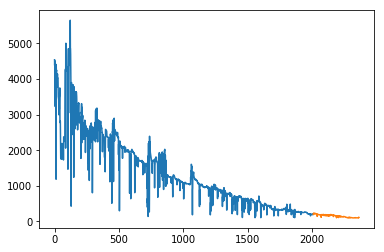

In [9]:
plt.plot(y_train)
plt.plot(y_test)

In [10]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size 
                                                  = val_fraction/(1-test_fraction), shuffle = True, random_state = 11)

In [11]:
scaler_x = MinMaxScaler()
x_train = scaler_x.fit_transform(x_train.as_matrix())
x_val = scaler_x.transform(x_val.as_matrix())
x_test = scaler_x.transform(x_test.as_matrix())

scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1,1))
y_val = scaler_y.transform(y_val.reshape(-1,1))
y_test = scaler_y.transform(y_test.reshape(-1,1))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



In [24]:
model_gbm = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [25]:
model_gbm.fit(x_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=4,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             presort='auto', random_state=5, subsample=1.0, verbose=0,
             warm_start=False)

In [26]:
model_gbm.score(x_val, y_val)

0.9733137513567571

In [16]:
model_gbm.score(x_test, y_test)

-2.0957217722078894

In [27]:
y_pred_gbm = scaler_y.inverse_transform(model_gbm.predict(x_test).reshape(-1,1))

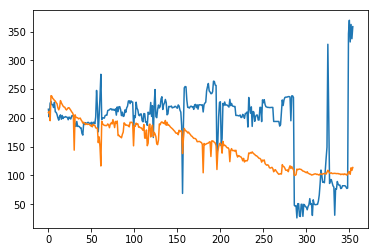

In [29]:
y_act = scaler_y.inverse_transform(y_test)
plt.plot(y_pred_gbm)
plt.plot(y_act)

In [30]:
model_ett = ExtraTreesRegressor()
model_ett.fit(x_train, y_train)
model_ett.score(x_val, y_val)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.9671769399535466

In [31]:
model_ett.score(x_test, y_test)

-3.9841179358136922

In [32]:
y_pred_ett = scaler_y.inverse_transform(model_ett.predict(x_test).reshape(-1,1))
trace1 = go.Scatter(x = y_act.reshape(-1,),
                    y = y_pred_ett.reshape(-1,),
                   name = "Actual",
                   mode = 'markers',
                   line=dict(width=10))
data = [trace1]
layout = go.Layout(
    xaxis=dict(
        title='Actual oil rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Predicted oil rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    )
)
fig = go.Figure(data=data, layout = layout)
py.iplot(fig)

In [34]:
from sklearn.model_selection import StratifiedSplit

ImportError: cannot import name 'StratifiedSplit'